In [1]:
drive_path = 'c:/'
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp
from scipy.stats import kruskal
from scipy.stats import variation
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import nanmean
from scipy.stats import nanstd

In [2]:
filename='C:\Users\Annie\Documents\Data\Ca_Imaging\Analysis\\Odor_Panel\\Odor_Trials.csv'
trials=pd.read_csv(filename)

# Figure 1: Graph individual traces

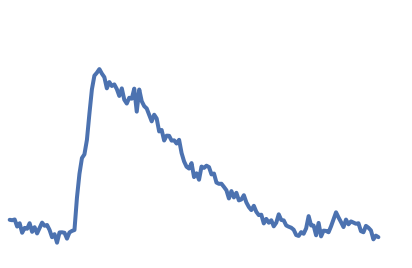

In [95]:
cell=5
trial=39
filename='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\160328_1\\%sdt.txt'%trial
comp=pd.read_csv(filename,index_col=0)
ncomp=pd.DataFrame(comp[1:150]['G PMT (%s)'%cell])
sns.set(style="white")
sns.set_context("paper",font_scale=3);
f,ax=plt.subplots()
ax.plot(ncomp,linewidth=4.0)
sns.despine(left=True,bottom=True)
plt.ylim(-0.15, 1);
plt.xticks(np.arange(0, 160, 25.0))
ax.set_yticks([]);
ax.set_xticks([]);
plt.tight_layout();
f.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\SampleTraces\HighRes\cell%s_%s.pdf"%(cell,trial))

# Figure 2: Baseline and Peak, Integral

In [3]:
x='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullbaseline_WL.csv'
baseline=pd.read_csv(x)
y='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullintegral_WL.csv'
integral=pd.read_csv(y)
z='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullpeak_WL.csv'
peak=pd.read_csv(z)
s='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullsuccess_WI.csv'
success=pd.read_csv(s)

In [4]:
melt_base=pd.melt(baseline,('Mouse','Group'),var_name='Odor')
melt_int=pd.melt(integral,('Mouse','Group'),var_name='Odor')
melt_success=pd.melt(success,('Mouse','Group'),var_name='Odor')
melt_peak=pd.melt(peak,('Mouse','Group'),var_name='Odor')

In [5]:
#THE ENTIRE DATAFRAME
completedf=pd.concat([melt_base[['Mouse','Group','Odor','value']],melt_int['value'],melt_peak['value'],melt_success['value']],axis=1)
completedf.columns=['Mouse','Group','Odor','Baseline','Integral','Peak','Success']

In [150]:
completedf.tail()

,Mouse,Group,Odor,Baseline,Integral,Peak,Success
13105,G PMT (22)_160626_2,Hexanal,Hexanal05,773.446970,NaN,NaN,NaN
13106,G PMT (23)_160626_2,Hexanal,Hexanal05,1403.306348,NaN,NaN,NaN
13107,G PMT (24)_160626_2,Hexanal,Hexanal05,1208.390758,NaN,NaN,NaN
13108,G PMT (25)_160626_2,Hexanal,Hexanal05,1190.651894,NaN,NaN,NaN
13109,G PMT (26)_160626_2,Hexanal,Hexanal05,836.463303,NaN,NaN,NaN


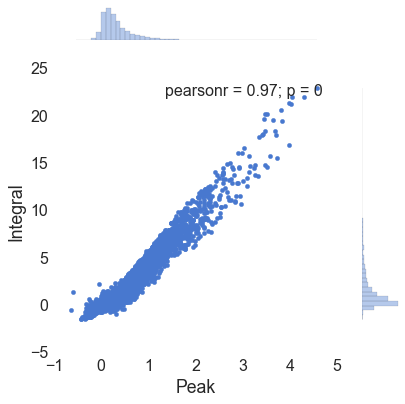

In [101]:
#GRAPH THE INTERACTIONS
sns.set(style='white',palette="muted", color_codes=True);
sns.set_context("paper",font_scale=2);
sns.jointplot('Peak','Integral',completedf);
sns.despine(left=True,bottom=True);
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\Correlations\Integral_Peak.pdf")

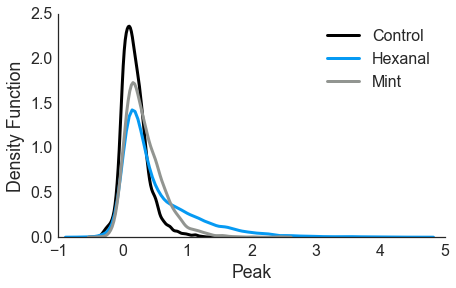

In [102]:
sns.set(style='white');
sns.set_context("paper",font_scale=2);
x=melt_peak[melt_peak.Group=='Control'].value.dropna();
y=melt_peak[melt_peak.Group=='Hexanal'].value.dropna();
z=melt_peak[melt_peak.Group=='Mint'].value.dropna();
sns.distplot(x,hist=False,color=sns.xkcd_rgb["black"],kde_kws={'lw':3,'label':'Control'});
sns.distplot(y,hist=False,color=sns.xkcd_rgb["azure"],kde_kws={'lw':3,'label':'Hexanal'});
sns.distplot(z,hist=False,color=sns.xkcd_rgb["grey"],kde_kws={'lw':3,'label':'Mint'});
sns.despine();
plt.tight_layout();
plt.xlabel('Peak');
plt.ylabel('Density Function');
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\Correlations\KDE_Peak.pdf")

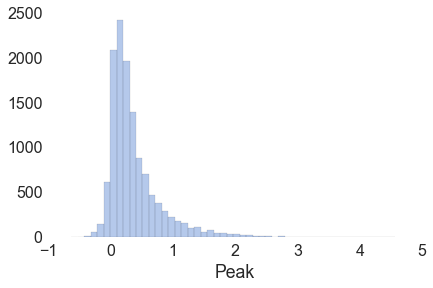

In [103]:
x=completedf.Peak.dropna()
sns.set(style='white',palette="muted", color_codes=True);
sns.set_context("paper",font_scale=2);
sns.distplot(x,kde=False);
sns.despine(left=True,bottom=True);
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\Correlations\Hist_Peak.pdf")

# Figure 3: Habituation

In [104]:
h='C:\Users\Annie\Documents\Data\Ca_Imaging\HabituationFiles\NormalizedHabituation.csv'
habituation=pd.read_csv(h)

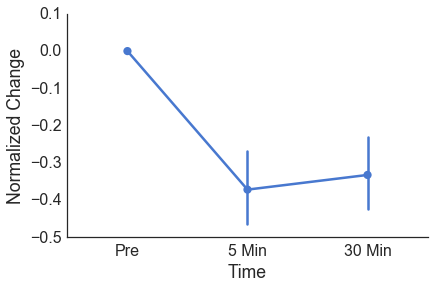

In [105]:
h=pd.melt(habituation,var_name='Time',value_name='Normalized Change');
sns.set(style='white',palette="muted", color_codes=True);
sns.set_context("paper",font_scale=2);
sns.pointplot(x='Time',y='Normalized Change',data=h);
plt.ylabel('Normalized Change')
sns.despine();
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\Habituation.pdf")

# Prep Peaks Dataframe

In [19]:
filename='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullpeak.csv'
comp=pd.read_csv(filename)
comp_sorted=comp.reindex_axis(comp.mean().sort_values().index, axis=1)
comp_labels=pd.DataFrame(comp.Mouse)
comp_group=pd.DataFrame(comp.Group)
tmp=[comp_group,comp_labels,comp_sorted]
composite_full=pd.concat(tmp,axis=1)
cfull=pd.melt(composite_full,['Group','Mouse'],var_name="Odor")

In [20]:
groupcolors={'Control':sns.xkcd_rgb["black"],'Mint':sns.xkcd_rgb["grey"],'Hexanal':sns.xkcd_rgb["azure"]};

In [21]:
#Make separate excitatory and inhibitory dataframes
mindf=pd.DataFrame([])
maxdf=pd.DataFrame([])
zdf=pd.DataFrame([])
for x in cfull.index:
    if cfull.value[x]>0:
        a=pd.DataFrame(cfull.iloc[x]).T
        maxdf=maxdf.append(a,ignore_index=True)
    elif cfull.value[x]<0:
        a=pd.DataFrame(cfull.iloc[x]).T
        mindf=mindf.append(a,ignore_index=True)
    else:
        a=pd.DataFrame(cfull.iloc[x]).T
        zdf=zdf.append(a,ignore_index=True)

In [6]:
one_mindf=mindf[['Group','Odor','value']][mindf.Odor.isin(['MS01','Hexanal01','IAA01','THA','AP','PA','Hexanone','EB'])]
conc_mindf=mindf[['Group','Odor','value']][mindf.Odor.isin(['MS01','MS05','MS10','Hexanal01','Hexanal05','Hexanal10','IAA01','IAA05','IAA10'])]
conc_mindf=conc_mindf.sort_values(by='Odor')

one_maxdf=maxdf[['Group','Odor','value']][maxdf.Odor.isin(['MS01','Hexanal01','IAA01','THA','AP','PA','Hexanone','EB'])]
conc_maxdf=maxdf[['Group','Odor','value']][maxdf.Odor.isin(['MS01','MS05','MS10','Hexanal01','Hexanal05','Hexanal10','IAA01','IAA05','IAA10'])]

one_mindf=one_mindf.replace(to_replace='MS01',value='MS')
one_mindf=one_mindf.replace(to_replace='Hexanal01',value='Hexanal')
one_mindf=one_mindf.replace(to_replace='IAA01',value='IAA')

one_maxdf=one_maxdf.replace(to_replace='MS01',value='MS')
one_maxdf=one_maxdf.replace(to_replace='Hexanal01',value='Hexanal')
one_maxdf=one_maxdf.replace(to_replace='IAA01',value='IAA')

sorter=('MS01','MS05','MS10','IAA01','IAA05','IAA10','Hexanal01','Hexanal05','Hexanal10')
conc_maxdf.Odor=conc_maxdf.Odor.astype('category')
conc_maxdf.Odor.cat.set_categories(sorter,inplace=True)
conc_maxdf=conc_maxdf.sort_values(['Odor'])

conc_mindf.Odor=conc_mindf.Odor.astype('category')
conc_mindf.Odor.cat.set_categories(sorter,inplace=True)
conc_mindf=conc_mindf.sort_values(['Odor'])

conc_mindf=conc_mindf.replace(to_replace='MS01',value='MS 1%')
conc_mindf=conc_mindf.replace(to_replace='MS05',value='MS 5%')
conc_mindf=conc_mindf.replace(to_replace='MS10',value='MS 10%')
conc_mindf=conc_mindf.replace(to_replace='IAA01',value='IAA 1%')
conc_mindf=conc_mindf.replace(to_replace='IAA05',value='IAA 5%')
conc_mindf=conc_mindf.replace(to_replace='IAA10',value='IAA 10%')
conc_mindf=conc_mindf.replace(to_replace='Hexanal01',value='Hexanal 1%')
conc_mindf=conc_mindf.replace(to_replace='Hexanal05',value='Hexanal 5%')
conc_mindf=conc_mindf.replace(to_replace='Hexanal10',value='Hexanal 10%')

conc_maxdf=conc_maxdf.replace(to_replace='MS01',value='MS 1%')
conc_maxdf=conc_maxdf.replace(to_replace='MS05',value='MS 5%')
conc_maxdf=conc_maxdf.replace(to_replace='MS10',value='MS 10%')
conc_maxdf=conc_maxdf.replace(to_replace='IAA01',value='IAA 1%')
conc_maxdf=conc_maxdf.replace(to_replace='IAA05',value='IAA 5%')
conc_maxdf=conc_maxdf.replace(to_replace='IAA10',value='IAA 10%')
conc_maxdf=conc_maxdf.replace(to_replace='Hexanal01',value='Hexanal 1%')
conc_maxdf=conc_maxdf.replace(to_replace='Hexanal05',value='Hexanal 5%')
conc_maxdf=conc_maxdf.replace(to_replace='Hexanal10',value='Hexanal 10%')

In [7]:
cat=('Control','Mint','Hexanal')

# Figure 4-5: Amplitude of excitatory responses/BOXPLOTS

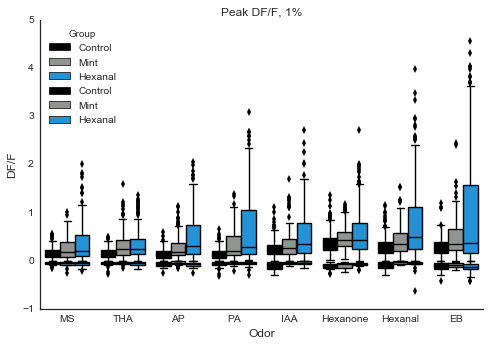

In [115]:
#1% CONCENTRATION
cat=('Control','Mint','Hexanal')
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
plt.figure(figsize=(7,5));
sns.boxplot(x='Odor',y='value',hue_order=cat,hue='Group',palette=groupcolors,data=one_maxdf);
sns.boxplot(x='Odor',y='value',hue_order=cat,hue='Group',palette=groupcolors,data=one_mindf);
# ax.legend_.remove()
sns.despine()
plt.ylabel('DF/F', fontsize=12);
plt.title('Peak DF/F, 1%', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(-1,5)
plt.tight_layout()
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Box\\box.pdf")

In [116]:
MS_conc_maxdf=conc_maxdf[conc_maxdf.Odor.isin(['MS 1%','MS 5%','MS 10%'])]
hex_conc_maxdf=conc_maxdf[conc_maxdf.Odor.isin(['Hexanal 1%','Hexanal 5%','Hexanal 10%'])]
IAA_conc_maxdf=conc_maxdf[conc_maxdf.Odor.isin(['IAA 1%','IAA 5%','IAA 10%'])]

MS_conc_mindf=conc_mindf[conc_mindf.Odor.isin(['MS 1%','MS 5%','MS 10%'])]
hex_conc_mindf=conc_mindf[conc_mindf.Odor.isin(['Hexanal 1%','Hexanal 5%','Hexanal 10%'])]
IAA_conc_mindf=conc_mindf[conc_mindf.Odor.isin(['IAA 1%','IAA 5%','IAA 10%'])]

In [117]:
conc_maxdf

,Group,Odor,value
0,Control,MS 1%,0.015671
512,Hexanal,MS 1%,0.216320
513,Hexanal,MS 1%,0.200734
514,Hexanal,MS 1%,0.126636
515,Hexanal,MS 1%,0.146380
516,Hexanal,MS 1%,0.209309
517,Hexanal,MS 1%,0.299622
518,Hexanal,MS 1%,0.148053
519,Hexanal,MS 1%,0.086919
520,Hexanal,MS 1%,0.024138


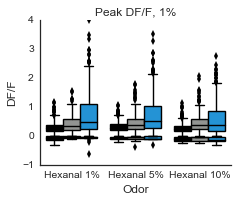

In [120]:
#Multiple Concentration
cat=('Control','Mint','Hexanal')
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
plt.figure(figsize=(3.5,3));
sns.boxplot(x='Odor',y='value',hue_order=cat,hue='Group',palette=groupcolors,data=hex_conc_mindf);
ax=sns.boxplot(x='Odor',y='value',hue_order=cat,hue='Group',palette=groupcolors,data=hex_conc_maxdf);
ax.legend_.remove()
sns.despine()
plt.ylabel('DF/F', fontsize=12);
plt.title('Peak DF/F, 1%', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(-1,4)
plt.tight_layout()
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Box\\hex_conc.pdf")

# Figure 4-5: MEDIAN

1%

In [132]:
#MEDIANS for 1%
medians=pd.DataFrame([])
df=one_maxdf
for x in df.Group.unique():
    tmp=pd.DataFrame([])
    for y in df.Odor.unique():
        a=df[(df.Group==x)&(df.Odor==y)]['value'].dropna().median()
        m=pd.DataFrame({y:[a]})
        tmp=pd.concat([tmp,m],axis=1)
    b=pd.DataFrame({'Group':[x]})
#     c=pd.DataFrame({'Group':[df[df.Mouse==x]['Group'].iloc[0]]})
#     c=c.reset_index(drop=True)
    tmp=pd.concat([b,tmp],axis=1)
    medians=medians.append(tmp)
maxmedianmelt=pd.melt(medians,"Group",var_name="Odor")

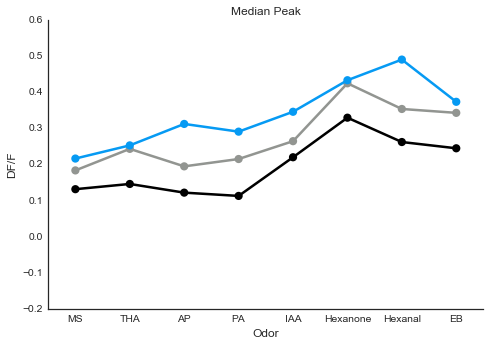

In [134]:
#Plot everything by group
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
plt.figure(figsize=(7,5));
ax=sns.pointplot(x='Odor',y='value',hue='Group',palette=groupcolors,data=maxmedianmelt)
# sns.pointplot(x='Odor',y='value',hue='Group',palette=groupcolors,data=minmedianmelt)
ax.legend_.remove()
sns.despine()
plt.ylabel('DF/F', fontsize=12);
plt.title('Median Peak', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(-0.2,0.6)
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Median\\Median_one.pdf")

Concentrations

In [129]:
#MEDIANS
medians=pd.DataFrame([])
# df=MS_conc_maxdf
# df=hex_conc_maxdf
df=IAA_conc_maxdf
for x in df.Group.unique():
    tmp=pd.DataFrame([])
    for y in df.Odor.unique():
        a=df[(df.Group==x)&(df.Odor==y)]['value'].dropna().median()
        m=pd.DataFrame({y:[a]})
        tmp=pd.concat([tmp,m],axis=1)
    b=pd.DataFrame({'Group':[x]})
#     c=pd.DataFrame({'Group':[df[df.Mouse==x]['Group'].iloc[0]]})
#     c=c.reset_index(drop=True)
    tmp=pd.concat([b,tmp],axis=1)
    medians=medians.append(tmp)
maxmedianmelt=pd.melt(medians,"Group",var_name="Odor")

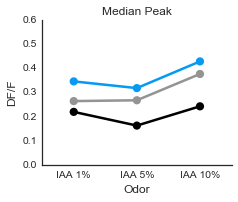

In [130]:
#Plot everything by group
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
plt.figure(figsize=(3.5,3));
ax=sns.pointplot(x='Odor',y='value',hue='Group',palette=groupcolors,data=maxmedianmelt)
# sns.pointplot(x='Odor',y='value',hue='Group',palette=groupcolors,data=minmedianmelt)
ax.legend_.remove()
sns.despine()
plt.ylabel('DF/F', fontsize=12);
plt.title('Median Peak', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(0,0.6)
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Median\\Median_IAA.pdf")

# Figure 6: Number of excitatory events

In [76]:
filename='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullpeak.csv'
comp=pd.read_csv(filename)
comp_sorted=comp.reindex_axis(comp.mean().sort_values().index, axis=1)
comp_labels=pd.DataFrame(comp.Mouse)
comp_group=pd.DataFrame(comp.Group)
tmp=[comp_group,comp_labels,comp_sorted]
composite_full=pd.concat(tmp,axis=1)
cfull=pd.melt(composite_full,['Group','Mouse'],var_name="Odor")

maxdf=pd.DataFrame([])
zdf=pd.DataFrame([])
for x in cfull.index:
    if cfull.value[x]>0:
        a=pd.DataFrame(cfull.iloc[x]).T
        maxdf=maxdf.append(a,ignore_index=True)
    else:
        a=pd.DataFrame(cfull.iloc[x]).T
        zdf=zdf.append(a,ignore_index=True)
zdf=zdf.dropna()

In [77]:
ratio=pd.DataFrame([])
for x in maxdf.Group.unique():
    for y in maxdf.Odor.unique():
        a=float(len(maxdf[(maxdf.Group==x) & (maxdf.Odor==y)]['value']))
        b=float(len(zdf[(zdf.Group==x) & (zdf.Odor==y)]['value']))
        E=a/(a+b)
        ratio=ratio.append(pd.DataFrame({'Group':[x],'Odor':[y],'Ratio':[E]}))

In [78]:
one_ratio=ratio[['Group','Odor','Ratio']][ratio.Odor.isin(['MS01','Hexanal01','IAA01','THA','AP','PA','Hexanone','EB'])]
conc_ratio=ratio[['Group','Odor','Ratio']][ratio.Odor.isin(['MS01','MS05','MS10','Hexanal01','Hexanal05','Hexanal10','IAA01','IAA05','IAA10'])]
conc_ratio=conc_ratio.sort_values(by='Odor')

one_ratio=ratio[['Group','Odor','Ratio']][ratio.Odor.isin(['MS01','Hexanal01','IAA01','THA','AP','PA','Hexanone','EB'])]
conc_ratio=ratio[['Group','Odor','Ratio']][ratio.Odor.isin(['MS01','MS05','MS10','Hexanal01','Hexanal05','Hexanal10','IAA01','IAA05','IAA10'])]

one_ratio=one_ratio.replace(to_replace='MS01',value='MS')
one_ratio=one_ratio.replace(to_replace='Hexanal01',value='Hexanal')
one_ratio=one_ratio.replace(to_replace='IAA01',value='IAA')

one_ratio=one_ratio.replace(to_replace='MS01',value='MS')
one_ratio=one_ratio.replace(to_replace='Hexanal01',value='Hexanal')
one_ratio=one_ratio.replace(to_replace='IAA01',value='IAA')

sorter=('MS01','MS05','MS10','IAA01','IAA05','IAA10','Hexanal01','Hexanal05','Hexanal10')
conc_ratio.Odor=conc_ratio.Odor.astype('category')
conc_ratio.Odor.cat.set_categories(sorter,inplace=True)
conc_ratio=conc_ratio.sort_values(['Odor'])

conc_ratio.Odor=conc_ratio.Odor.astype('category')
conc_ratio.Odor.cat.set_categories(sorter,inplace=True)
conc_ratio=conc_ratio.sort_values(['Odor'])

conc_ratio=conc_ratio.replace(to_replace='MS01',value='MS 1%')
conc_ratio=conc_ratio.replace(to_replace='MS05',value='MS 5%')
conc_ratio=conc_ratio.replace(to_replace='MS10',value='MS 10%')
conc_ratio=conc_ratio.replace(to_replace='IAA01',value='IAA 1%')
conc_ratio=conc_ratio.replace(to_replace='IAA05',value='IAA 5%')
conc_ratio=conc_ratio.replace(to_replace='IAA10',value='IAA 10%')
conc_ratio=conc_ratio.replace(to_replace='Hexanal01',value='Hexanal 1%')
conc_ratio=conc_ratio.replace(to_replace='Hexanal05',value='Hexanal 5%')
conc_ratio=conc_ratio.replace(to_replace='Hexanal10',value='Hexanal 10%')

conc_ratio=conc_ratio.replace(to_replace='MS01',value='MS 1%')
conc_ratio=conc_ratio.replace(to_replace='MS05',value='MS 5%')
conc_ratio=conc_ratio.replace(to_replace='MS10',value='MS 10%')
conc_ratio=conc_ratio.replace(to_replace='IAA01',value='IAA 1%')
conc_ratio=conc_ratio.replace(to_replace='IAA05',value='IAA 5%')
conc_ratio=conc_ratio.replace(to_replace='IAA10',value='IAA 10%')
conc_ratio=conc_ratio.replace(to_replace='Hexanal01',value='Hexanal 1%')
conc_ratio=conc_ratio.replace(to_replace='Hexanal05',value='Hexanal 5%')
conc_ratio=conc_ratio.replace(to_replace='Hexanal10',value='Hexanal 10%')

In [79]:
MS_conc_ratio=conc_ratio[conc_ratio.Odor.isin(['MS 1%','MS 5%','MS 10%'])]
hex_conc_ratio=conc_ratio[conc_ratio.Odor.isin(['Hexanal 1%','Hexanal 5%','Hexanal 10%'])]
IAA_conc_ratio=conc_ratio[conc_ratio.Odor.isin(['IAA 1%','IAA 5%','IAA 10%'])]

MS_conc_ratio=conc_ratio[conc_ratio.Odor.isin(['MS 1%','MS 5%','MS 10%'])]
hex_conc_ratio=conc_ratio[conc_ratio.Odor.isin(['Hexanal 1%','Hexanal 5%','Hexanal 10%'])]
IAA_conc_ratio=conc_ratio[conc_ratio.Odor.isin(['IAA 1%','IAA 5%','IAA 10%'])]

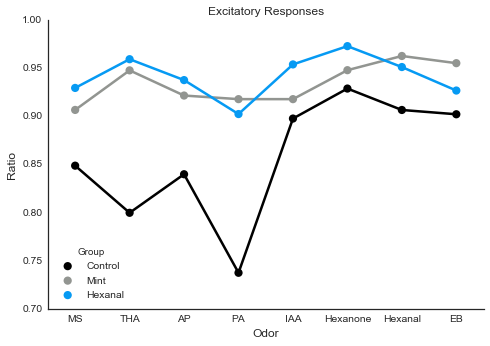

In [65]:
# 1%
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
plt.figure(figsize=(7,5));
ax=sns.pointplot(x='Odor',y='Ratio',hue='Group',palette=groupcolors,data=one_ratio)
# ax.legend_.remove()
sns.despine()
plt.ylabel('Ratio', fontsize=12);
plt.title('Excitatory Responses', fontsize=12);
plt.xlabel('Odor', fontsize=12);
# plt.ylim(-0.2,0.6)
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Excitatory\\Excitatory_One.pdf")

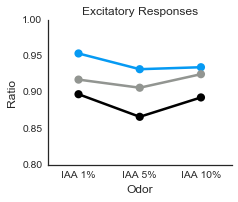

In [82]:
#Different concentrations
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
plt.figure(figsize=(3.5,3));
ax=sns.pointplot(x='Odor',y='Ratio',hue='Group',palette=groupcolors,data=IAA_conc_ratio)
ax.legend_.remove()
sns.despine()
plt.ylabel('Ratio', fontsize=12);
plt.title('Excitatory Responses', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(0.8,1)
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Excitatory\\Excitatory_IAA.pdf")

# Number of odorants responded to

In [71]:
EI=pd.DataFrame([])
for x in composite_full.index:
    a=0
    b=0
    for value in composite_full.iloc[x][2:]:
        if value>0:
            a=a+1
        elif value<0:
            b=b+1
    c=pd.DataFrame(composite_full.iloc[x][['Group','Mouse']]).T
    c=c.reset_index(drop=True)
    d=pd.concat([c,pd.DataFrame({'E':[a]}),pd.DataFrame({'I':[b]})],axis=1)
    EI=EI.append(d)

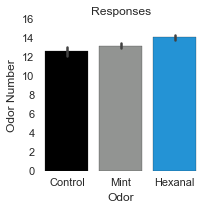

In [92]:
sns.set(style="white")
sns.set_context('paper')
plt.figure(figsize=(3,3))
sns.barplot(x='Group', y="E", data=EI,
            label="E", palette=groupcolors);
sns.despine(left=True, bottom=True)
plt.ylabel('Odor Number', fontsize=12);
plt.title('Responses', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.xticks(fontsize=11);
plt.yticks(fontsize=11);
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Excitatory\\Odors.pdf")

# Figure 7: Reliability

In [6]:
melt_success=pd.melt(success,('Mouse','Group'),var_name='Odor')
melt_peak=pd.melt(peak,('Mouse','Group'),var_name='Odor')
z='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullpeak_WL.csv'
peak=pd.read_csv(z)
s='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullsuccess_WI.csv'
success=pd.read_csv(s)
rdf=pd.concat([melt_peak[['Mouse','Group','Odor','value']],melt_success['value']],axis=1)
rdf.columns=['Mouse','Group','Odor','Peak','Success']

In [7]:
rdf.tail()

,Mouse,Group,Odor,Peak,Success
12940,G PMT (22)_160626_2,Hexanal,Hexanal05,2.629784,1.0
12941,G PMT (23)_160626_2,Hexanal,Hexanal05,2.228448,1.0
12942,G PMT (24)_160626_2,Hexanal,Hexanal05,2.581529,1.0
12943,G PMT (25)_160626_2,Hexanal,Hexanal05,1.906673,1.0
12944,G PMT (26)_160626_2,Hexanal,Hexanal05,2.273161,1.0


In [8]:
smalldf=pd.DataFrame([])
xdf=pd.DataFrame([])
for x in rdf.Mouse.unique():
    for y in rdf.Odor.unique():
        b=rdf[(rdf.Mouse==x)&(rdf.Odor==y)].Peak.values[0]
        if b>0:
            c=rdf[(rdf.Mouse==x)&(rdf.Odor==y)]
            smalldf=smalldf.append(c,ignore_index=True)
        else:
            a=rdf[(rdf.Mouse==x)&(rdf.Odor==y)]
            xdf=xdf.append(a,ignore_index=True)
xdf=xdf.dropna()

In [43]:
one_r=smalldf[['Group','Odor','Success']][smalldf.Odor.isin(['MS01','Hexanal01','IAA01','THA','AP','PA','Hexanone','EB'])]
conc_r=smalldf[['Group','Odor','Success']][smalldf.Odor.isin(['MS01','MS05','MS10','Hexanal01','Hexanal05','Hexanal10','IAA01','IAA05','IAA10'])]
conc_r=conc_r.sort_values(by='Odor')

one_r=smalldf[['Group','Odor','Success']][smalldf.Odor.isin(['MS01','Hexanal01','IAA01','THA','AP','PA','Hexanone','EB'])]
conc_r=smalldf[['Group','Odor','Success']][smalldf.Odor.isin(['MS01','MS05','MS10','Hexanal01','Hexanal05','Hexanal10','IAA01','IAA05','IAA10'])]

sorting=('MS01','THA','AP','PA','IAA01','Hexanone','Hexanal01','EB')
one_r.Odor=one_r.Odor.astype('category')
one_r.Odor.cat.set_categories(sorting,inplace=True)
one_r=one_r.sort_values(['Odor'])

one_r=one_r.replace(to_replace='MS01',value='MS')
one_r=one_r.replace(to_replace='Hexanal01',value='Hexanal')
one_r=one_r.replace(to_replace='IAA01',value='IAA')

one_r=one_r.replace(to_replace='MS01',value='MS')
one_r=one_r.replace(to_replace='Hexanal01',value='Hexanal')
one_r=one_r.replace(to_replace='IAA01',value='IAA')

sorter=('MS01','MS05','MS10','IAA01','IAA05','IAA10','Hexanal01','Hexanal05','Hexanal10')
conc_r.Odor=conc_r.Odor.astype('category')
conc_r.Odor.cat.set_categories(sorter,inplace=True)
conc_r=conc_r.sort_values(['Odor'])

conc_r.Odor=conc_r.Odor.astype('category')
conc_r.Odor.cat.set_categories(sorter,inplace=True)
conc_r=conc_r.sort_values(['Odor'])

conc_r=conc_r.replace(to_replace='MS01',value='MS 1%')
conc_r=conc_r.replace(to_replace='MS05',value='MS 5%')
conc_r=conc_r.replace(to_replace='MS10',value='MS 10%')
conc_r=conc_r.replace(to_replace='IAA01',value='IAA 1%')
conc_r=conc_r.replace(to_replace='IAA05',value='IAA 5%')
conc_r=conc_r.replace(to_replace='IAA10',value='IAA 10%')
conc_r=conc_r.replace(to_replace='Hexanal01',value='Hexanal 1%')
conc_r=conc_r.replace(to_replace='Hexanal05',value='Hexanal 5%')
conc_r=conc_r.replace(to_replace='Hexanal10',value='Hexanal 10%')

conc_r=conc_r.replace(to_replace='MS01',value='MS 1%')
conc_r=conc_r.replace(to_replace='MS05',value='MS 5%')
conc_r=conc_r.replace(to_replace='MS10',value='MS 10%')
conc_r=conc_r.replace(to_replace='IAA01',value='IAA 1%')
conc_r=conc_r.replace(to_replace='IAA05',value='IAA 5%')
conc_r=conc_r.replace(to_replace='IAA10',value='IAA 10%')
conc_r=conc_r.replace(to_replace='Hexanal01',value='Hexanal 1%')
conc_r=conc_r.replace(to_replace='Hexanal05',value='Hexanal 5%')
conc_r=conc_r.replace(to_replace='Hexanal10',value='Hexanal 10%')

In [45]:
groupcolors={'Control':sns.xkcd_rgb["black"],'Mint':sns.xkcd_rgb["grey"],'Hexanal':sns.xkcd_rgb["azure"]};

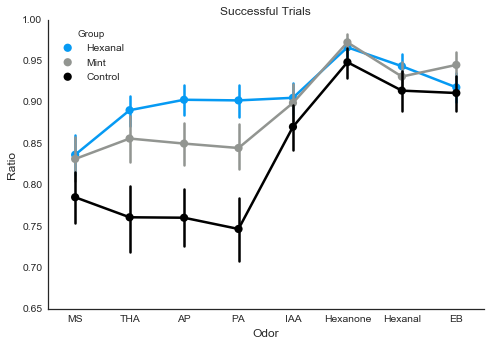

In [47]:
# 1%
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
plt.figure(figsize=(7,5));
ax=sns.pointplot(x='Odor',y='Success',hue='Group',palette=groupcolors,data=one_r)
# ax.legend_.remove()
sns.despine()
plt.ylabel('Ratio', fontsize=12);
plt.title('Successful Trials', fontsize=12);
plt.xlabel('Odor', fontsize=12);
# plt.ylim(-0.2,0.6)
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Excitatory\\Successes_One.pdf")

In [49]:
MS_conc_r=conc_r[conc_r.Odor.isin(['MS 1%','MS 5%','MS 10%'])]
hex_conc_r=conc_r[conc_r.Odor.isin(['Hexanal 1%','Hexanal 5%','Hexanal 10%'])]
IAA_conc_r=conc_r[conc_r.Odor.isin(['IAA 1%','IAA 5%','IAA 10%'])]

MS_conc_r=conc_r[conc_r.Odor.isin(['MS 1%','MS 5%','MS 10%'])]
hex_conc_r=conc_r[conc_r.Odor.isin(['Hexanal 1%','Hexanal 5%','Hexanal 10%'])]
IAA_conc_r=conc_r[conc_r.Odor.isin(['IAA 1%','IAA 5%','IAA 10%'])]

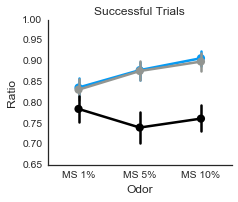

In [74]:
# 1%
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
plt.figure(figsize=(3.5,3));
ax=sns.pointplot(x='Odor',y='Success',hue='Group',palette=groupcolors,data=MS_conc_r)
ax.legend_.remove()
sns.despine()
plt.ylabel('Ratio', fontsize=12);
plt.title('Successful Trials', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(0.65,1)
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Excitatory\\Successes_MS.pdf")

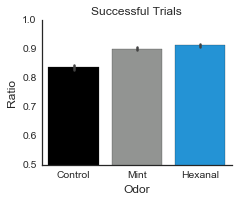

In [86]:
#boxplots
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("paper", font_scale=1.3);
plt.figure(figsize=(3.5,3));
ax=sns.barplot(x='Group',y='Success',palette=groupcolors,data=smalldf)
# ax.legend_.remove()
sns.despine()
plt.ylabel('Ratio', fontsize=12);
plt.title('Successful Trials', fontsize=12);
plt.xlabel('Odor', fontsize=12);
plt.ylim(0.5,1)
plt.tight_layout();
plt.savefig("C:\Users\Annie\Desktop\Plasticity\Figures\\Excitatory\\Successes_Summary.pdf")

In [62]:
smalldf

,Mouse,Group,Odor,Peak,Success
0,G PMT (1)_160321_1,Control,IAA10,0.099708,1.00
1,G PMT (1)_160321_1,Control,IAA01,0.188597,1.00
2,G PMT (1)_160321_1,Control,AP,0.036738,0.75
3,G PMT (1)_160321_1,Control,MS10,0.150474,1.00
4,G PMT (1)_160321_1,Control,IAA05,0.034294,0.75
5,G PMT (1)_160321_1,Control,Hexanal01,0.062999,0.25
6,G PMT (1)_160321_1,Control,MS01,0.015671,0.75
7,G PMT (1)_160321_1,Control,PA,0.037389,0.50
8,G PMT (1)_160321_1,Control,MS05,0.169456,1.00
9,G PMT (1)_160321_1,Control,Hexanone,0.093353,1.00
